# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [421]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [422]:
data = pd.read_excel('lawrence_dataset.xlsx')

Display the first 5 rows of the dataset using `.head()`

In [423]:
data.head()

,name,posts_or_share_frequently,active,replies_to_comments,num_of_friends_or_followers,personality
0,Emil,0,1,1,3700,0
1,Danielle,0,1,0,996,0
2,Danfred,1,1,1,227,0
3,Edrich,0,1,0,871,0
4,Lovely,1,1,1,357,0


Display the summary of all the features of the dataset using `.info()`

In [424]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         100 non-null    object
 1   posts_or_share_frequently    100 non-null    int64 
 2   active                       100 non-null    int64 
 3   replies_to_comments          100 non-null    int64 
 4   num_of_friends_or_followers  100 non-null    int64 
 5   personality                  100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [425]:
data['personality'].value_counts()

personality
0    52
1    48
Name: count, dtype: int64

Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

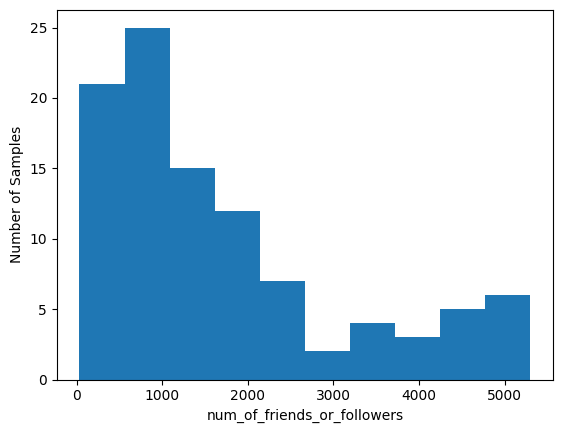

In [426]:
plt.hist(data['num_of_friends_or_followers'])
plt.xlabel("num_of_friends_or_followers")
plt.ylabel("Number of Samples")
plt.show()

Remove the name column using `drop()` method

In [427]:
# Remove the name column
data.drop(columns="name", inplace=True)

In [428]:
data.head()

,posts_or_share_frequently,active,replies_to_comments,num_of_friends_or_followers,personality
0,0,1,1,3700,0
1,0,1,0,996,0
2,1,1,1,227,0
3,0,1,0,871,0
4,1,1,1,357,0


## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [429]:
x = data.drop(columns=["personality"]).values
print(x[0:5])

[[   0    1    1 3700]
 [   0    1    0  996]
 [   1    1    1  227]
 [   0    1    0  871]
 [   1    1    1  357]]


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [430]:
y = data["personality"].values
print(y[0:5])

[0 0 0 0 0]


Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [431]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=10)


Display the dimensions of each variables using `.shape()`

In [432]:
# put your answer
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [433]:
knn = KNeighborsClassifier(n_neighbors=23)

Train the model using the `.fit()`

In [434]:
knn.fit(x_train, y_train)

,n_neighbors,23
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Test the model using the `.predict()`

In [435]:
y_pred = knn.predict(x_test)

## E. Evaluate the model

Create a confusion matrix

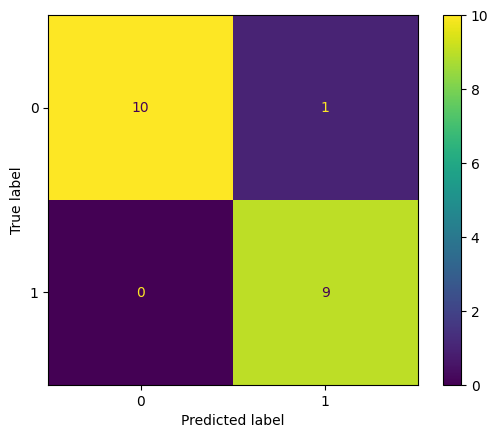

In [436]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)

disp.plot()

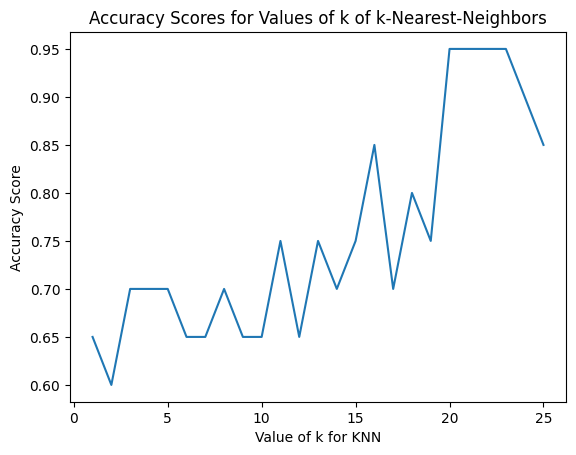

In [437]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(x_train, y_train)

    # Test the model
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Display the accuracy

In [438]:
metrics.accuracy_score(y_test, y_pred)

0.85

Display the precision

In [439]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.88888889 0.81818182]


Display the recall

In [440]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.8 0.9]


Display the f1-score

In [441]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.84210526 0.85714286]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [444]:
knn.predict([[0, 1, 0, 996]])

array([0])